,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Training score: 0.8436936936936937
Test score: 0.8404372927158825
Faction <= 50k 0.76003276003276


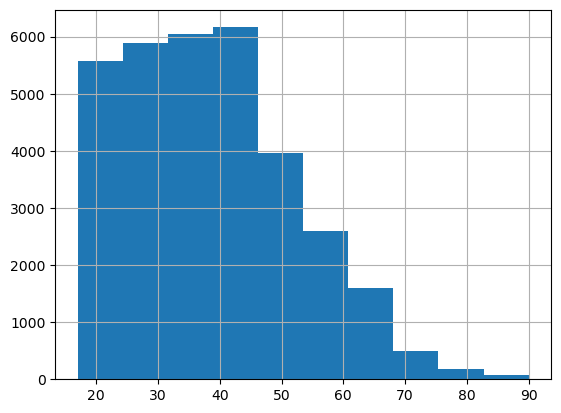

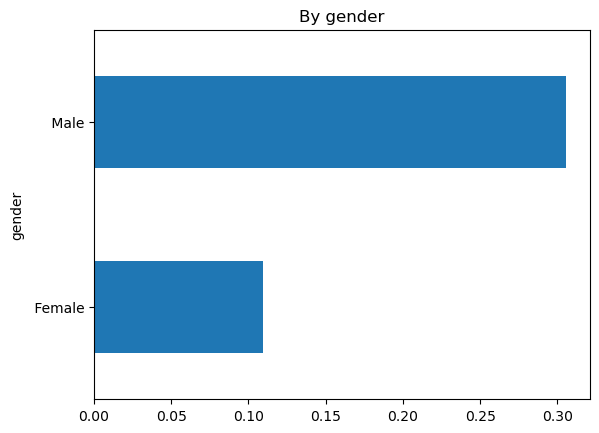

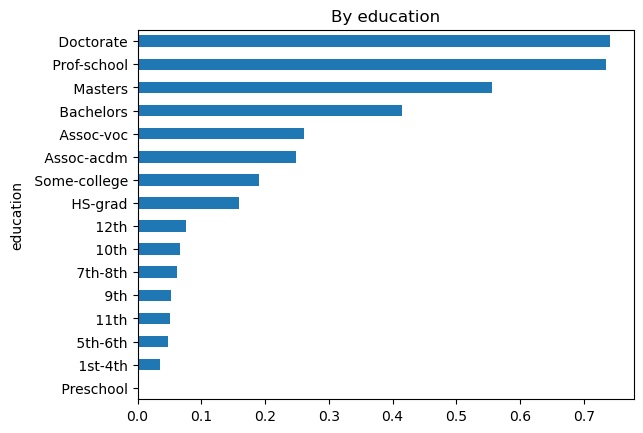

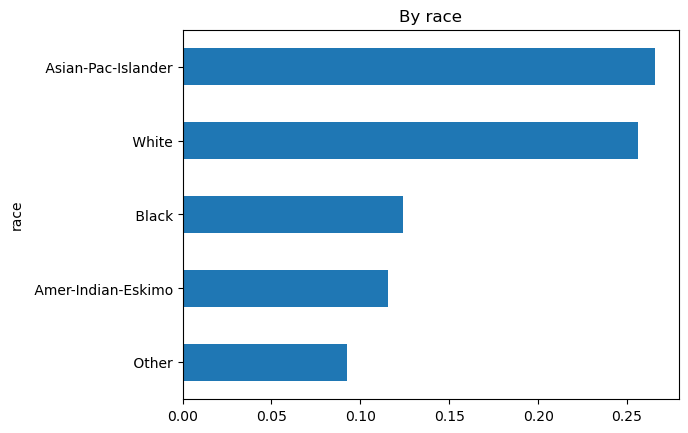

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# We use display so that we can do multiple nice renderings of dataframes
# in Jupyter
from IPython.display import display

# Exercise 1
data = pd.read_csv("data/adult.csv", index_col=0)
display(data.head())

income = data.income
data_features = data.drop("income", axis=1)

display(data_features.head())

# Exercise 2

data.age.hist()

# plot by gender
data['income_bin'] = data.income == " >50K"
plt.figure()
plt.title("By gender")
grouped = data.groupby("gender")
grouped.income_bin.mean().plot.barh()

# plot by education
plt.figure()
plt.title("By education")
data.groupby("education").income_bin.mean().sort_values().plot.barh()

plt.figure()
plt.title("By race")
data.groupby("race").income_bin.mean().sort_values().plot.barh()

# Exercise 3
data_one_hot = pd.get_dummies(data_features)
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, income)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Exercise 4
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train_scaled, y_train)
print("Training score:", logreg.score(X_train_scaled, y_train))

X_test_scaled = scaler.transform(X_test)
print("Test score:", logreg.score(X_test_scaled, y_test))
      
print("Faction <= 50k", (y_train.values == " <=50K").mean())